In [1]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

In [2]:
import pandas as pd
df=pd.read_csv("F:/SAI/textanalytics/Dataset Project/seasonal.csv",na_values=['NaN'])

df.shape


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(483504, 79)

In [3]:
df.columns

Index(['visitorid', 'visitordate', 'visitormonth', 'visitoryear',
       'visitorstartdayname', 'visitorstarthour', 'visitorduration',
       'visitorsession', 'brand', 'devicetype', 'eventcountpt', 'eventcountlc',
       'trafficsource', 'campaignsiteid', 'campaignbuyid',
       'campaignadvertisementid', 'campaignplacementid', 'campaigncreativeid',
       'campaignpskeyword', 'searchenginekeyword', 'vehicle200pt',
       'vehicle200lc', 'vehicle200convertiblept', 'vehicle200convertiblelc',
       'vehicle300pt', 'vehicle300lc', 'vehicletowncountrypt',
       'vehicletowncountrylc', 'vsclanding', 'vscmodels', 'vscgallery',
       'vscexterior', 'vscinterior', 'vscperformance', 'vscsafety',
       'vscawards', 'vscspecifications', 'vscmodelhighlights', 'vscdimensions',
       'vscwarranty', 'msplanding', 'mspgallery', 'mspexterior', 'mspinterior',
       'mspperformance', 'mspsafety', 'stbmovehicleselector', 'stmodels',
       'stcolors', 'stoptions', 'stsummaries', 'stenterzip',
     

In [5]:
x=["visitorid","visitordate","visitormonth","visitoryear","visitorsession","brand","devicetype","trafficsource","campaignbuyid"]
for i in x:
    print(df[i].value_counts(normalize=True)*100)
    print("********************")

2DCJB0JH5E-0966-638F    0.011168
2DFGJ16EC3-D3C4-68HH    0.009721
2E1D5H59A4-6CF9-C28A    0.008066
2D9E82D837-F001-I9JG    0.007446
2BGCD6J269-J4A6-3FAH    0.007032
                          ...   
2D4G9DD38F-00C1-B9F4    0.000207
2DC64F81A6-JGFD-0EFB    0.000207
2E25B88607-HGJ9-HCIE    0.000207
2DG6GI3EB8-EF20-C2HG    0.000207
2DB9HJBIFF-4I46-078B    0.000207
Name: visitorid, Length: 462344, dtype: float64
********************
26    3.596661
27    3.511243
19    3.501315
18    3.470292
15    3.419827
29    3.403902
17    3.377635
8     3.354471
16    3.346818
10    3.335236
20    3.332754
30    3.315588
28    3.313933
12    3.304626
23    3.301110
9     3.269259
24    3.261400
6     3.239270
11    3.231618
5     3.222310
22    3.189219
21    3.179912
25    3.179084
7     3.168536
3     3.161711
13    3.142270
2     3.084566
4     3.063677
1     3.034928
14    3.009075
31    1.677752
Name: visitordate, dtype: float64
********************
Jun    17.424675
Jul    17.329536
Aug    17.3142

In [4]:
# 462344 visitors
#visitorsession - 1 to 15
# campaign buy id : 144 , needs cleaning
# brand=chrysler , visitoryear =2013

In [5]:
#df0.drop(["visitoryear","brand","searchenginekeyword"],axis=1,inplace=True)

In [4]:
df["vscsafety"].value_counts(normalize=True)*100

0     99.335683
1      0.491413
2      0.113753
3      0.032058
4      0.014478
5      0.006825
6      0.003102
7      0.001241
8      0.000827
13     0.000207
10     0.000207
9      0.000207
Name: vscsafety, dtype: float64

In [7]:
#how many visitors
#frequency of visit
#which days of week more visitors
#what time of day more visitors
#which month more visitors
#which time period most visitors spent time 
#how much time spent
#how many sessions per visitor
#which device type for top visitors
#what kind of search is prominent traffic source
#campaign buy id?
#wat are the keywords ,searchengine


# NLP

In [5]:
nlp=pd.DataFrame(df['campaignpskeyword'])
nlp.dropna(inplace=True)

In [6]:
nlp.head()

,campaignpskeyword
1,chrysler 300
4,chrysler
6,chrysler
15,car review
18,300 chrysler


In [7]:
from wordcloud import WordCloud

In [8]:
nlp_combined=" ".join(nlp.campaignpskeyword.values)

In [9]:
word_cloud =WordCloud(width=800,height=800,
                      background_color='white',
                      max_words=150).generate(nlp_combined)

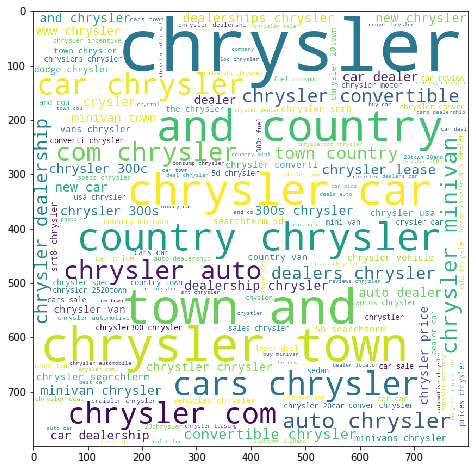

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [11]:
from nltk.probability import FreqDist
all_terms =nlp_combined.split(" ")
fdist= FreqDist(all_terms)

In [12]:
df_dist=pd.DataFrame(fdist.items(),columns=['words','freq'])

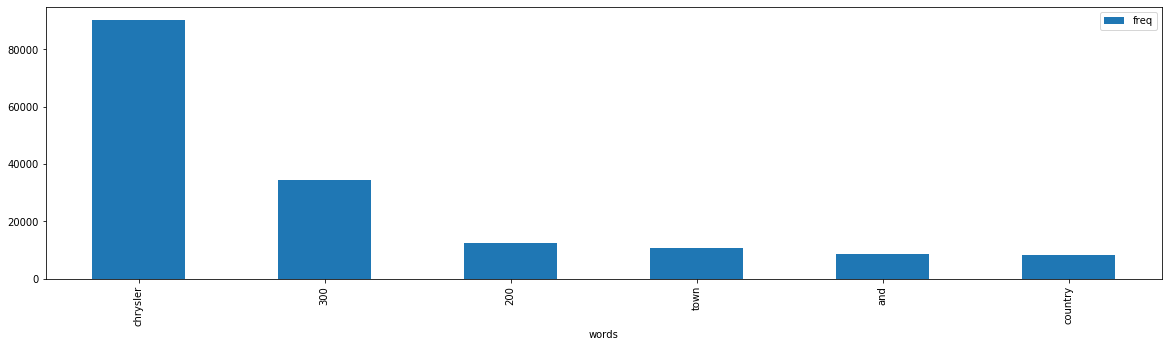

In [13]:
%matplotlib inline
df_dist.sort_values(ascending=False,by="freq").head(6).\
plot.bar(x="words",y="freq",figsize=(20,5))

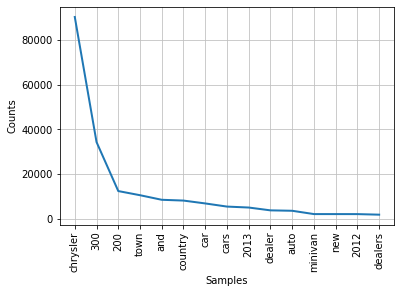

In [14]:
fdist.plot(15)
plt.show()

# Sales Division

In [19]:
df1=pd.read_excel("F:/SAI/textanalytics/Dataset Project/sales all division.xlsx",header=None)

In [20]:
df1.shape

(362128, 20)

In [21]:
# y=["Brand","Model_Year","Body_Model","Trim_Level","Paint_Code","EngineCode"]
# for i in y:
#     print(df1[i].value_counts())
#     print("********************")

In [23]:
records=[]
for i in range(0,362128) :
    records.append([str(df1.values[i,j]) for j in range(0,17)])

In [24]:
import apyori 
from apyori import apriori
association_rules = apriori(records, min_support=0.05, \
                            min_confidence = 0.7, \
                           min_lift = 1.2, min_length = 2)

In [25]:
association_results = list(association_rules)

In [26]:
df2_results= pd.DataFrame(association_results)

In [27]:
df2_results.head()

,items,support,ordered_statistics
0,"(GRAND CHEROKEE LIMITED 4X4, 2014)",0.050438,"[((GRAND CHEROKEE LIMITED 4X4), (2014), 0.9895..."
1,"(GRD CHER, 2014)",0.118085,"[((GRD CHER), (2014), 0.9615704616491646, 1.93..."
2,"(Jeep Division, 2014)",0.288536,"[((Jeep Division), (2014), 0.8418020834172554,..."
3,"(CA, CALIFORNIA)",0.069453,"[((CA), (CALIFORNIA), 1.0, 13.948923385077617)..."
4,"(TOWN & COUNTRY, Chrysler Division)",0.051449,"[((TOWN & COUNTRY), (Chrysler Division), 1.0, ..."


In [28]:
Support = df2_results.support
Base_values = []
Add_values = []
Confidence_values = []
Lift_values = []

In [29]:
for i in range(df2_results.shape[0]):
    single_list = df2_results['ordered_statistics'][i][0]
    Base_values.append(list(single_list[0]))
    
    
    
    Add_values.append(list(single_list[1]))
    Confidence_values.append(single_list[2])
    Lift_values.append(single_list[3])

In [30]:
Base = pd.DataFrame(Base_values)
Add = pd.DataFrame(Add_values)
Confidence =pd.DataFrame(Confidence_values,columns=['Confidance'])
Lift=pd.DataFrame(Lift_values,columns=['lift'])

In [31]:
df2_final = pd.concat([Base,Add,Support,Confidence,Lift], axis=1)
df2_final

,0,1,0,1,2,support,Confidance,lift
0,GRAND CHEROKEE LIMITED 4X4,None,2014,None,None,0.050438,0.989597,1.991957
1,GRD CHER,None,2014,None,None,0.118085,0.961570,1.935541
2,Jeep Division,None,2014,None,None,0.288536,0.841802,1.694460
3,CA,None,CALIFORNIA,None,None,0.069453,1.000000,13.948923
4,TOWN & COUNTRY,None,Chrysler Division,None,None,0.051449,1.000000,8.090438
5,DART,None,Dodge Division,None,None,0.051623,1.000000,3.698429
6,FL,None,SOUTHEAST,None,None,0.056624,1.000000,6.545468
7,GRAND CHEROKEE LIMITED 4X4,None,GRD CHER,None,None,0.050968,1.000000,8.143015
8,GRAND CHEROKEE LIMITED 4X4,None,Jeep Division,None,None,0.050968,1.000000,2.917493
9,GRD CHER,None,Jeep Division,None,None,0.122805,1.000000,2.917493


In [32]:
data=df2_final.sort_values('support', ascending=False)

In [33]:
data[data["Confidance"]>=0.80]

,0,1,0,1,2,support,Confidance,lift
2,Jeep Division,None,2014,None,None,0.288536,0.841802,1.694460
9,GRD CHER,None,Jeep Division,None,None,0.122805,1.000000,2.917493
21,GRD CHER,None,Jeep Division,2014,None,0.118085,0.961570,3.332583
1,GRD CHER,None,2014,None,None,0.118085,0.961570,1.935541
17,TX,None,SOUTHWEST,None,None,0.109293,1.000000,6.097355
15,RAM LD CREW,None,RAM Division,None,None,0.078055,1.000000,4.264644
11,WRANGLER 4 DR,None,Jeep Division,None,None,0.073474,1.000000,2.917493
3,CA,None,CALIFORNIA,None,None,0.069453,1.000000,13.948923
13,New York,None,NORTHEAST,None,None,0.063886,0.996726,7.686655
12,NY,None,NORTHEAST,None,None,0.063163,1.000000,7.711907


# Data Preparation

In [32]:
# columns from 20 to 79

In [15]:
df.shape

(483504, 79)

In [16]:
df.head()

,visitorid,visitordate,visitormonth,visitoryear,visitorstartdayname,visitorstarthour,visitorduration,visitorsession,brand,devicetype,...,stbrochuremailform,stbrochuredownloadform,stbrochuresubmitted,stsignupforupdatesform,stsignupforupdatessubmit,stmodelcompareindex,stmodelcomparemodelbymodel,stmodelcomparequickchart,stmodelcomparegraphsnumbers,stmodelcomparedetailedchart
0,2DEGHH81B2-4H79-J2G7,6,Aug,2013,Sun,10:59:43,13,1,Chrysler,Mobile,...,0,0,0,0,0,0,0,0,0,0
1,2DB42B0569-H5HD-JJBF,13,Jun,2013,Sun,10:22:40,39,1,Chrysler,Computer,...,0,0,0,0,0,0,0,0,0,0
2,2D61CGGJ2C-2F86-43G9,6,Sep,2013,Sun,19:05:23,2,2,Chrysler,Computer,...,0,0,0,0,0,0,0,0,0,0
3,2E19765EF7-AG57-5J72,12,Nov,2013,Sat,13:03:23,49,1,Chrysler,Computer,...,0,0,0,0,0,0,0,0,0,0
4,2DDD5IH5G2-IH15-5I3J,19,Jul,2013,Sat,23:30:07,484,1,Chrysler,Computer,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.columns.get_loc("vehicle200pt")

20

In [18]:
df.columns.get_loc('stmodelcomparedetailedchart')

78

In [19]:
len(df.columns)


79

In [20]:
num=df.columns[20:79]
num


Index(['vehicle200pt', 'vehicle200lc', 'vehicle200convertiblept',
       'vehicle200convertiblelc', 'vehicle300pt', 'vehicle300lc',
       'vehicletowncountrypt', 'vehicletowncountrylc', 'vsclanding',
       'vscmodels', 'vscgallery', 'vscexterior', 'vscinterior',
       'vscperformance', 'vscsafety', 'vscawards', 'vscspecifications',
       'vscmodelhighlights', 'vscdimensions', 'vscwarranty', 'msplanding',
       'mspgallery', 'mspexterior', 'mspinterior', 'mspperformance',
       'mspsafety', 'stbmovehicleselector', 'stmodels', 'stcolors',
       'stoptions', 'stsummaries', 'stenterzip', 'stenterzipresult',
       'stdlhours', 'stdlservices', 'stdldealersites', 'stsnivehicleselector',
       'stsnivehicleselectorresult', 'stsnivin', 'stsnidetails',
       'stsnidealers', 'sttestdriveform', 'sttestdrivecomplete',
       'stincentivesbrand', 'stincentivesvehicle', 'stprecalc',
       'stpaymentresults', 'stgaqform', 'stgaqsubmitted', 'stbrochuremailform',
       'stbrochuredownloadfor

In [21]:
df['stsignupforupdatesform'].value_counts(normalize=True)[0]

0.9995987623680466

In [22]:
X=[]
for i in num:
    x=df[i].value_counts(normalize=True)[0]
    x>0.90
    X.append(i)

In [23]:
X

['vehicle200pt',
 'vehicle200lc',
 'vehicle200convertiblept',
 'vehicle200convertiblelc',
 'vehicle300pt',
 'vehicle300lc',
 'vehicletowncountrypt',
 'vehicletowncountrylc',
 'vsclanding',
 'vscmodels',
 'vscgallery',
 'vscexterior',
 'vscinterior',
 'vscperformance',
 'vscsafety',
 'vscawards',
 'vscspecifications',
 'vscmodelhighlights',
 'vscdimensions',
 'vscwarranty',
 'msplanding',
 'mspgallery',
 'mspexterior',
 'mspinterior',
 'mspperformance',
 'mspsafety',
 'stbmovehicleselector',
 'stmodels',
 'stcolors',
 'stoptions',
 'stsummaries',
 'stenterzip',
 'stenterzipresult',
 'stdlhours',
 'stdlservices',
 'stdldealersites',
 'stsnivehicleselector',
 'stsnivehicleselectorresult',
 'stsnivin',
 'stsnidetails',
 'stsnidealers',
 'sttestdriveform',
 'sttestdrivecomplete',
 'stincentivesbrand',
 'stincentivesvehicle',
 'stprecalc',
 'stpaymentresults',
 'stgaqform',
 'stgaqsubmitted',
 'stbrochuremailform',
 'stbrochuredownloadform',
 'stbrochuresubmitted',
 'stsignupforupdatesform',

In [24]:
import numpy as np
for i in X:
        df[i]=np.where(df[i]> 0,0,1)

In [43]:
#columns from 1 to 19
#brand visitoryear vistorid 

In [25]:
df.columns

Index(['visitorid', 'visitordate', 'visitormonth', 'visitoryear',
       'visitorstartdayname', 'visitorstarthour', 'visitorduration',
       'visitorsession', 'brand', 'devicetype', 'eventcountpt', 'eventcountlc',
       'trafficsource', 'campaignsiteid', 'campaignbuyid',
       'campaignadvertisementid', 'campaignplacementid', 'campaigncreativeid',
       'campaignpskeyword', 'searchenginekeyword', 'vehicle200pt',
       'vehicle200lc', 'vehicle200convertiblept', 'vehicle200convertiblelc',
       'vehicle300pt', 'vehicle300lc', 'vehicletowncountrypt',
       'vehicletowncountrylc', 'vsclanding', 'vscmodels', 'vscgallery',
       'vscexterior', 'vscinterior', 'vscperformance', 'vscsafety',
       'vscawards', 'vscspecifications', 'vscmodelhighlights', 'vscdimensions',
       'vscwarranty', 'msplanding', 'mspgallery', 'mspexterior', 'mspinterior',
       'mspperformance', 'mspsafety', 'stbmovehicleselector', 'stmodels',
       'stcolors', 'stoptions', 'stsummaries', 'stenterzip',
     

In [26]:
df.columns.get_loc('campaignsiteid')

13

In [27]:
df.columns.get_loc('searchenginekeyword')

19

In [28]:
df.drop(df.columns[13:20],axis=1,inplace=True)

In [29]:
df.drop(['visitorid','visitoryear'],axis=1,inplace=True)

In [30]:
df.drop(['brand'],axis=1,inplace=True)

In [31]:
df.columns

Index(['visitordate', 'visitormonth', 'visitorstartdayname',
       'visitorstarthour', 'visitorduration', 'visitorsession', 'devicetype',
       'eventcountpt', 'eventcountlc', 'trafficsource', 'vehicle200pt',
       'vehicle200lc', 'vehicle200convertiblept', 'vehicle200convertiblelc',
       'vehicle300pt', 'vehicle300lc', 'vehicletowncountrypt',
       'vehicletowncountrylc', 'vsclanding', 'vscmodels', 'vscgallery',
       'vscexterior', 'vscinterior', 'vscperformance', 'vscsafety',
       'vscawards', 'vscspecifications', 'vscmodelhighlights', 'vscdimensions',
       'vscwarranty', 'msplanding', 'mspgallery', 'mspexterior', 'mspinterior',
       'mspperformance', 'mspsafety', 'stbmovehicleselector', 'stmodels',
       'stcolors', 'stoptions', 'stsummaries', 'stenterzip',
       'stenterzipresult', 'stdlhours', 'stdlservices', 'stdldealersites',
       'stsnivehicleselector', 'stsnivehicleselectorresult', 'stsnivin',
       'stsnidetails', 'stsnidealers', 'sttestdriveform',
       '

In [32]:
df["time"]=pd.to_datetime(df["visitorstarthour"]).dt.hour

In [33]:
df['visitorsession']=np.where(df['visitorsession']>1,0,1)

In [34]:
df['visitorsession'].value_counts(normalize=True)

1    0.940336
0    0.059664
Name: visitorsession, dtype: float64

In [35]:
df.drop('visitorstarthour',axis=1,inplace=True)

In [37]:
df['trafficsource']=np.where( (df['trafficsource']=='Direct') | (df['trafficsource']=='Paid Search') | (df['trafficsource']=='Natural Search') |(df['trafficsource']=='Display'),df['trafficsource'],'Others')

In [38]:
df['trafficsource'].value_counts(normalize=True)

Direct            0.314376
Paid Search       0.224666
Natural Search    0.212137
Others            0.137835
Display           0.110986
Name: trafficsource, dtype: float64

In [40]:
df.columns


Index(['visitordate', 'visitormonth', 'visitorstartdayname', 'visitorduration',
       'visitorsession', 'devicetype', 'eventcountpt', 'eventcountlc',
       'trafficsource', 'vehicle200pt', 'vehicle200lc',
       'vehicle200convertiblept', 'vehicle200convertiblelc', 'vehicle300pt',
       'vehicle300lc', 'vehicletowncountrypt', 'vehicletowncountrylc',
       'vsclanding', 'vscmodels', 'vscgallery', 'vscexterior', 'vscinterior',
       'vscperformance', 'vscsafety', 'vscawards', 'vscspecifications',
       'vscmodelhighlights', 'vscdimensions', 'vscwarranty', 'msplanding',
       'mspgallery', 'mspexterior', 'mspinterior', 'mspperformance',
       'mspsafety', 'stbmovehicleselector', 'stmodels', 'stcolors',
       'stoptions', 'stsummaries', 'stenterzip', 'stenterzipresult',
       'stdlhours', 'stdlservices', 'stdldealersites', 'stsnivehicleselector',
       'stsnivehicleselectorresult', 'stsnivin', 'stsnidetails',
       'stsnidealers', 'sttestdriveform', 'sttestdrivecomplete',
     

In [41]:
df['vscsafety'].value_counts(normalize=True)

1    0.993357
0    0.006643
Name: vscsafety, dtype: float64

In [42]:
df.head()

,visitordate,visitormonth,visitorstartdayname,visitorduration,visitorsession,devicetype,eventcountpt,eventcountlc,trafficsource,vehicle200pt,...,stbrochuredownloadform,stbrochuresubmitted,stsignupforupdatesform,stsignupforupdatessubmit,stmodelcompareindex,stmodelcomparemodelbymodel,stmodelcomparequickchart,stmodelcomparegraphsnumbers,stmodelcomparedetailedchart,time
0,6,Aug,Sun,13,1,Mobile,1,4,Others,1,...,1,1,1,1,1,1,1,1,1,10
1,13,Jun,Sun,39,1,Computer,4,3,Paid Search,1,...,1,1,1,1,1,1,1,1,1,10
2,6,Sep,Sun,2,0,Computer,2,2,Direct,1,...,1,1,1,1,1,1,1,1,1,19
3,12,Nov,Sat,49,1,Computer,4,4,Direct,1,...,1,1,1,1,1,1,1,1,1,13
4,19,Jul,Sat,484,1,Computer,12,10,Paid Search,0,...,1,1,1,1,1,1,1,1,1,23


# Decision Tree

In [43]:
X=df.drop("stpaymentresults",axis=1)


In [44]:
X=pd.get_dummies(X)
X.shape

(483504, 85)

In [45]:
y=df['stpaymentresults']

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'compat'

In [102]:
under=RandomOverSampler(random_state=1) #parameter replacement is false by default
X,y=under.fit_resample(X,y)

In [103]:
y=y.astype('str')

In [104]:
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [105]:
import sklearn.tree as tree
dt=tree.DecisionTreeClassifier(max_depth=5,random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [106]:
dt.score(X_train,y_train)

0.8484014827213837

In [ ]:
# Grid Search DT

In [107]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [108]:
num_leafs = [1, 5, 10, 20, 50, 100]
depths = np.arange(1, 21)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

In [109]:
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
gdt = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10)

In [ ]:
#gdt = gdt.fit(X_train, y_train)

In [ ]:
#gdt.best_estimator_

In [ ]:
#print(gdt.best_params_)

In [112]:
import os
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=X_train.columns,  
                         filled=True, rounded=True)

In [113]:
graph = pydotplus.graph_from_dot_data(dot_data)   

graph.write_jpeg("Chrys.jpeg")

True

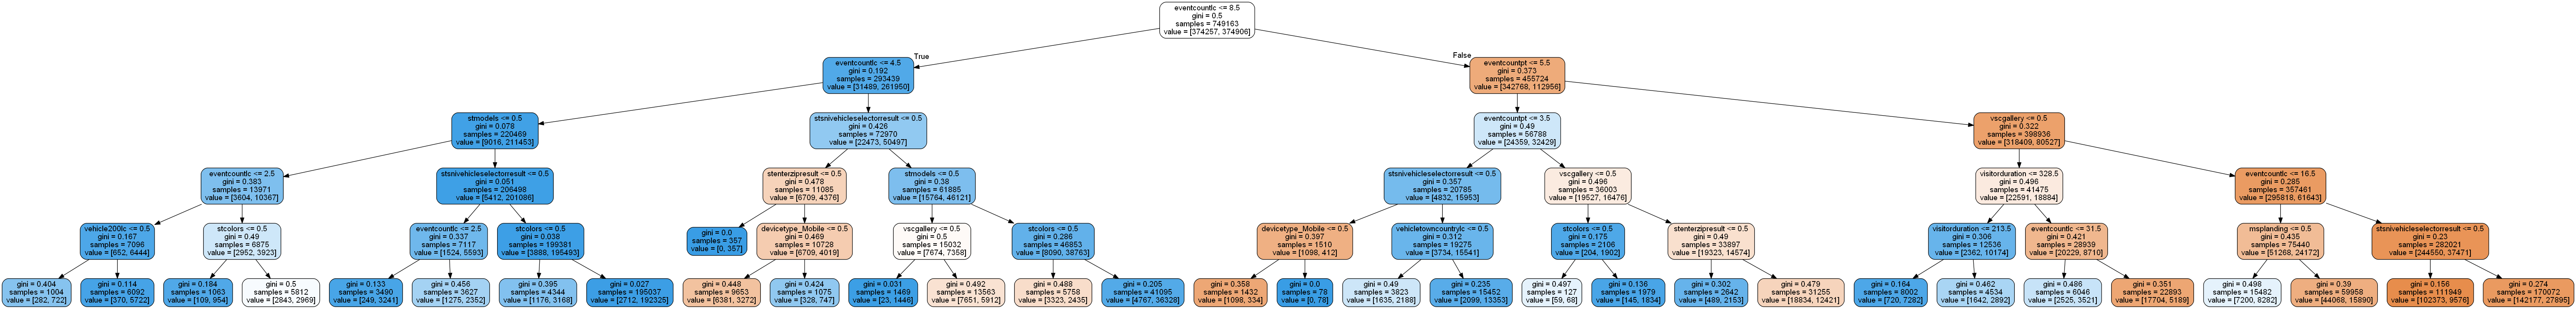

In [114]:
from IPython.display import Image
Image(graph.create_png())

In [115]:
import sklearn.metrics
sklearn.metrics.mean_squared_error(y_test,dt.predict(X_test))

0.1524205647895521

In [116]:
pd.Series(dt.feature_importances_,index=X.columns).sort_values(ascending=False).head(12)

eventcountlc                  0.787050
eventcountpt                  0.077783
vscgallery                    0.036912
visitorduration               0.024132
stsnivehicleselectorresult    0.021565
stmodels                      0.019363
stcolors                      0.014574
msplanding                    0.008672
stenterzipresult              0.005414
vehicletowncountrylc          0.002525
devicetype_Mobile             0.001606
vehicle200lc                  0.000404
dtype: float64

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,max_depth=5,oob_score=True,random_state=1)

In [118]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# grf=GridSearchCV(reg,param_grid={'max_depth':[3,5,7],'max_features':[3,5,7],'n_estimators':[w for w in range(50,300,10)]})
# grf.fit(X_train,y_train)

In [ ]:
#grf.best_estimator_

In [119]:
rf.score(X_test,y_test)

0.8479958994292305

In [132]:
from sklearn import metrics
metrics.mean_squared_error(y_test,rf.predict(X_test))

0.15200410057076955

In [120]:
pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(13)*100

eventcountlc                  22.737603
visitorduration               16.341978
eventcountpt                  15.812723
stmodels                       7.611090
stcolors                       7.056823
stsnivehicleselectorresult     5.812854
stoptions                      5.072566
vehicletowncountrylc           4.123665
stsummaries                    3.824809
stsnidetails                   2.629417
vehicletowncountrypt           2.072274
vehicle300lc                   1.180357
devicetype_Mobile              0.859726
dtype: float64

# Boosting

In [138]:
xg.score(X_test,y_test)

0.6773726461553236

In [145]:
pd.Series(xg.feature_importances_,index=X.columns).sort_values(ascending=False).head(27)*100

eventcountlc                    19.854830
vscgallery                       7.071822
stsnivehicleselectorresult       5.822054
stmodels                         4.451515
stcolors                         4.239072
stenterzipresult                 3.932212
stprecalc                        3.699720
eventcountpt                     2.922713
stgaqform                        2.629762
msplanding                       2.498675
devicetype_Mobile                2.485958
vehicletowncountrylc             2.110448
trafficsource_Others             1.859268
stsnidetails                     1.730023
vscmodelhighlights               1.474048
stsummaries                      1.433158
vsclanding                       1.374419
mspgallery                       1.323925
mspinterior                      1.282108
visitorduration                  1.168972
stdldealersites                  1.136864
vehicle200lc                     1.126537
stoptions                        1.103333
vehicle300lc                     1